**Features**
- Species: {'Otolithoides pama', 'Pethia conchonius', 'Polynemus paradiseus', 'Anabas testudineus', 'Setipinna taty', 'Puntius lateristriga', 'Coilia dussumieri', 'Otolithoides biauritus', 'Sillaginopsis panijus'}
- Length of fish
- Weight of fish
- W_I_ratio: lenght/weight

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./fish_data.csv")
df

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31
...,...,...,...,...
4075,Sillaginopsis panijus,30.56,6.12,0.20
4076,Sillaginopsis panijus,29.66,6.11,0.21
4077,Sillaginopsis panijus,32.81,6.25,0.19
4078,Sillaginopsis panijus,29.78,6.11,0.21


### Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is the process of examining a dataset to summarize its main characteristics, often using statistical graphics and visualization techniques. The goal of EDA is to understand the distributions, relationships, and patterns in the data, detect anomalies or outliers, and identify potential preprocessing steps before building predictive models. It provides insights that guide feature selection, scaling, and model design, ensuring that subsequent analyses are informed and effective.

In [3]:
df.head()

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB


C:\Users\ed\AppData\Local\Temp\ipykernel_28892\2956966442.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=df, palette='tab20', order=order)


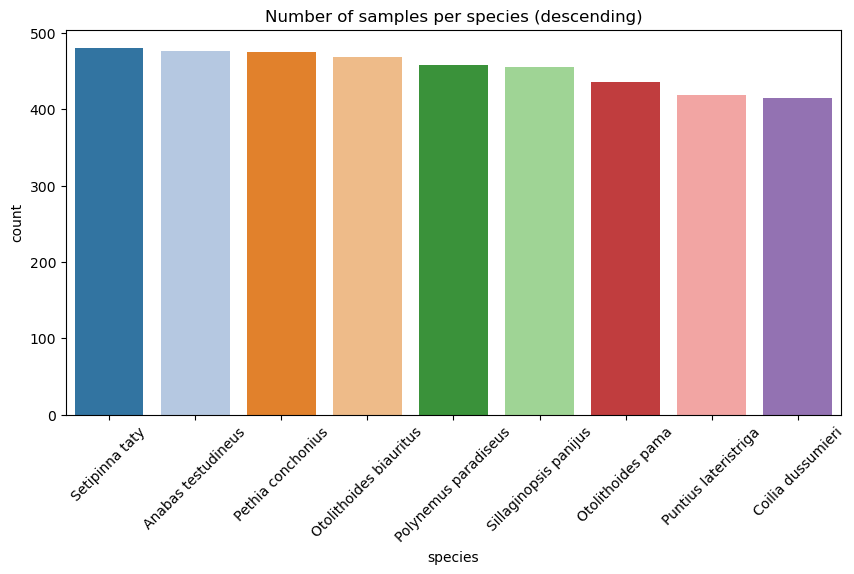

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

order = df['species'].value_counts().index

plt.figure(figsize=(10,5))
sns.countplot(x='species', data=df, palette='tab20', order=order)
plt.xticks(rotation=45)
plt.title("Number of samples per species (descending)")
plt.show()

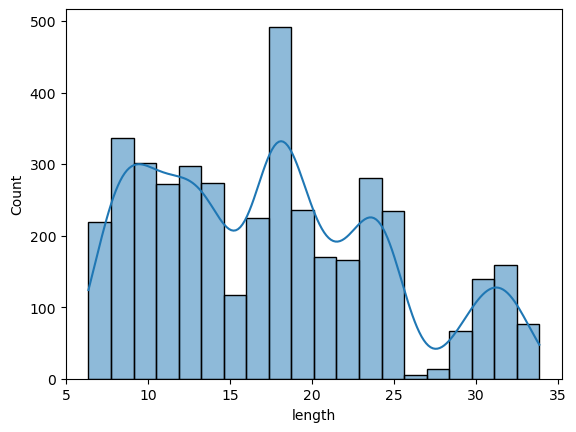

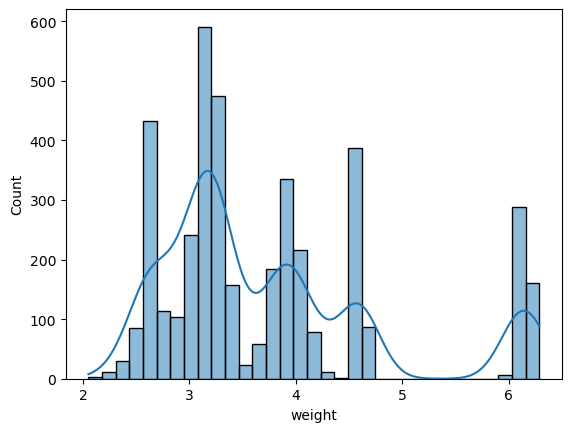

In [6]:
sns.histplot(df['length'], kde=True)
plt.show()
sns.histplot(df['weight'], kde=True)
plt.show()

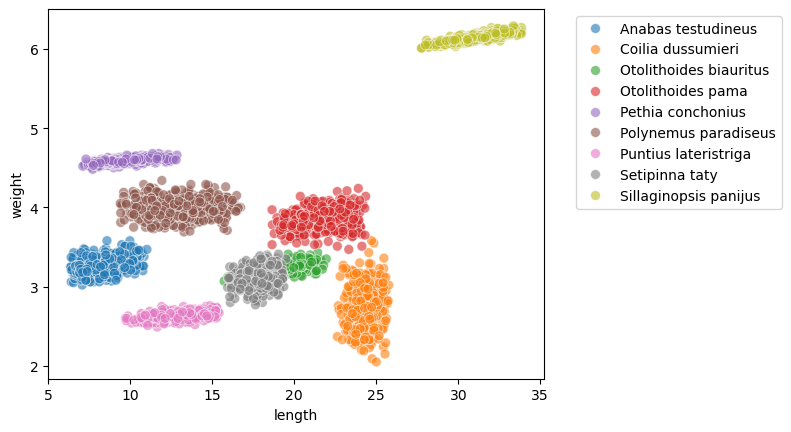

In [7]:
sns.scatterplot(
    x='length', y='weight', hue='species', data=df,
    s=50,
    alpha=0.6
)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Data Preprocessing

Before training a machine learning model, data preprocessing is essential. This typically involves **feature scaling** for numerical variables and **encoding** for categorical targets.

#### 1. Feature Scaling (Standardization)

Standardization transforms a feature $$x$$ to have zero mean and unit variance:

$$
x' = \frac{x - \mu}{\sigma}
$$

where:

- $$x$$ is the original feature value,  
- $$\mu$$ is the mean of the feature,  
- $$\sigma$$ is the standard deviation of the feature,  
- $$x'$$ is the standardized value.

This ensures that all features contribute equally to the learning process, avoiding dominance by features with larger ranges.

#### 2. Label Encoding

Categorical target labels $$y$$ are converted into integer codes:

$$
y_i \in \{0, 1, \dots, C-1\}
$$

where $$C$$ is the number of classes. This is necessary for classification algorithms that require numerical targets, such as neural networks with cross-entropy loss.

#### 3. Train-Test Split

The dataset is divided into training and testing sets to evaluate generalization. Often, **stratified splitting** is used to maintain the class distribution:

$$
\text{Train}, \text{Test} = \text{split}(X, y, \text{test\_size}=0.2, \text{stratify}=y)
$$

This ensures that both sets contain proportional representation of each class.

![Train_test_split](https://ugc.futurelearn.com/uploads/assets/45/36/45368b70-cb90-4647-8c5d-0fd1dcec2fbf.png)

In [8]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

X = df[['length', 'weight', 'w_l_ratio']].values
y = df['species'].values

In [9]:
import numpy as np
print("Before preprocesing")
print("______________________________________________________________")
print(
    f"max value: {np.max(X):.4f}\n"
    f"min value: {np.min(X):.4f}\n"
    f"mean: {np.mean(X):.4f}\n"
    f"std: {np.std(X):.4f}"
)
print("______________________________________________________________")

scaler = StandardScaler()
X_scaled = X #scaler.fit_transform(X)
print("After preprocesing")
print("______________________________________________________________")
print(
    f"max value: {np.max(X_scaled):.4f}\n"
    f"min value: {np.min(X_scaled):.4f}\n"
    f"mean: {np.mean(X_scaled):.4f}\n"
    f"std: {np.std(X_scaled):.4f}"
)
print("______________________________________________________________")

Before preprocesing
______________________________________________________________
max value: 33.8600
min value: 0.0800
mean: 7.1154
std: 8.4659
______________________________________________________________
After preprocesing
______________________________________________________________
max value: 33.8600
min value: 0.0800
mean: 7.1154
std: 8.4659
______________________________________________________________


In [10]:
print("Before Encoder")
print(set(y))
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("______________________________________________")

print("\nAfter Encoder")
print(set(y_encoded))
print("______________________________________________")

Before Encoder
{'Anabas testudineus', 'Pethia conchonius', 'Otolithoides pama', 'Coilia dussumieri', 'Otolithoides biauritus', 'Puntius lateristriga', 'Sillaginopsis panijus', 'Setipinna taty', 'Polynemus paradiseus'}
______________________________________________

After Encoder
{np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)}
______________________________________________


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

### Neural Network Architecture

We implement a fully connected feedforward neural network for multiclass classification, named `FishNet`. The network architecture is as follows:

- **Input Layer:** Accepts `input_dim` features, corresponding to the numerical attributes of the dataset (e.g., length, weight, and weight-length ratio).  

- **Hidden Layers:**  
  - **First hidden layer:** `hidden_dim` neurons with ReLU activation.  
  - **Second hidden layer:** `hidden_dim` neurons with ReLU activation.  

- **Output Layer:** `output_dim` neurons, one per class, representing the probability scores for each fish species. The output is suitable for use with `CrossEntropyLoss` in PyTorch, which combines softmax activation and negative log-likelihood.  

The network is trained using mini-batches loaded from `DataLoader` objects, with a batch size of 32 for both training and testing. Input features are converted to `torch.float32`, and target labels to `torch.long` to ensure compatibility with PyTorch loss functions.


In [16]:
pip install torch

  Using cached torch-2.8.0-cp313-cp313-win_amd64.whl.metadata (30 kB)
Using cached torch-2.8.0-cp313-cp313-win_amd64.whl (241.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [19]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

class FishNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FishNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.net(x)

input_dim = X_train.shape[1]
hidden_dim = 64
output_dim = len(le.classes_)


model = FishNet(input_dim, hidden_dim, output_dim)

### Loss Function: Cross-Entropy

For multiclass classification, we use the **Cross-Entropy Loss**, which measures the difference between the predicted probabilities and the true labels.

Mathematically, for a single sample, the loss is defined as:

$$
\mathcal{L} = - \sum_{i=1}^{C} y_i \log(\hat{y}_i)
$$

where:

- \(C\) is the number of classes,  
- \(y_i\) is the true label (1 if the sample belongs to class \(i\), 0 otherwise),  
- \(\hat{y}_i\) represents the raw output (logits) of the network for class \(i\). The softmax is applied internally by CrossEntropyLoss.

For a batch of \(N\) samples, the average loss is:

$$
\mathcal{L}_{batch} = - \frac{1}{N} \sum_{n=1}^{N} \sum_{i=1}^{C} y_i^{(n)} \log(\hat{y}_i^{(n)})
$$

This loss function encourages the network to assign high probability to the correct class while penalizing incorrect predictions.

### Optimizer Summary

| Optimizer | Update Rule / Equation | Advantages | When to Use |
|-----------|----------------------|------------|-------------|
| **SGD** | $\theta = \theta - \eta \nabla_\theta J(\theta)$ | Simple, low memory, easy to understand | Basic tasks, small datasets |
| **SGD with Momentum** | $v_t = \beta v_{t-1} + (1-\beta) \nabla_\theta J(\theta)$ <br> $\theta = \theta - \eta v_t$ | Faster convergence, smooth updates | Deep networks, large datasets |
| **AdaGrad** | $\theta = \theta - \frac{\eta}{\sqrt{G_t + \epsilon}} \nabla_\theta J(\theta)$ | Adapts learning rate per parameter, good for sparse data | Sparse features, NLP, embeddings |
| **RMSProp** | $v_t = \beta v_{t-1} + (1-\beta) (\nabla_\theta J(\theta))^2$ <br> $\theta = \theta - \frac{\eta}{\sqrt{v_t + \epsilon}} \nabla_\theta J(\theta)$ | Prevents vanishing learning rate | RNNs, deep networks, long sequences |
| **Adam** | $\theta_t = \theta_{t-1} - \eta \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}$ | Combines momentum and adaptive learning rate, fast and stable | Most neural networks, default choice |
| **Nadam** | Adam + Nesterov momentum | Predicts future gradient for stability | Deep networks, sequences |
| **AdamW** | Adam with decoupled weight decay | Better regularization | Avoid overfitting in deep networks |
| **Adadelta** | Extension of AdaGrad with dynamic learning rate | Avoids decreasing learning rate too much | When AdaGrad decays too quickly |

In [20]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [21]:
epochs = 50
train_losses = []
test_losses = []

for epoch in range(epochs):
    model.train()
    running_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        outputs = model(xb)
        loss = criterion(outputs, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * xb.size(0)
    epoch_train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    model.eval()
    running_test_loss = 0
    with torch.no_grad():
        for xb, yb in test_loader:
            outputs = model(xb)
            loss = criterion(outputs, yb)
            running_test_loss += loss.item() * xb.size(0)
    epoch_test_loss = running_test_loss / len(test_loader.dataset)
    test_losses.append(epoch_test_loss)

    print(f"Epoch {epoch+1}/{epochs} - Train Loss: {epoch_train_loss:.4f} - Test Loss: {epoch_test_loss:.4f}")

Epoch 1/50 - Train Loss: 2.0426 - Test Loss: 1.7819
Epoch 2/50 - Train Loss: 1.5341 - Test Loss: 1.3214
Epoch 3/50 - Train Loss: 1.1780 - Test Loss: 1.0441
Epoch 4/50 - Train Loss: 0.9488 - Test Loss: 0.8642
Epoch 5/50 - Train Loss: 0.7867 - Test Loss: 0.7100
Epoch 6/50 - Train Loss: 0.6607 - Test Loss: 0.6143
Epoch 7/50 - Train Loss: 0.5713 - Test Loss: 0.5425
Epoch 8/50 - Train Loss: 0.5049 - Test Loss: 0.4750
Epoch 9/50 - Train Loss: 0.4535 - Test Loss: 0.4366
Epoch 10/50 - Train Loss: 0.4133 - Test Loss: 0.4126
Epoch 11/50 - Train Loss: 0.3771 - Test Loss: 0.3570
Epoch 12/50 - Train Loss: 0.3507 - Test Loss: 0.3263
Epoch 13/50 - Train Loss: 0.3197 - Test Loss: 0.3069
Epoch 14/50 - Train Loss: 0.3048 - Test Loss: 0.2955
Epoch 15/50 - Train Loss: 0.2836 - Test Loss: 0.2730
Epoch 16/50 - Train Loss: 0.2666 - Test Loss: 0.2528
Epoch 17/50 - Train Loss: 0.2556 - Test Loss: 0.2411
Epoch 18/50 - Train Loss: 0.2408 - Test Loss: 0.2395
Epoch 19/50 - Train Loss: 0.2308 - Test Loss: 0.2197
Ep

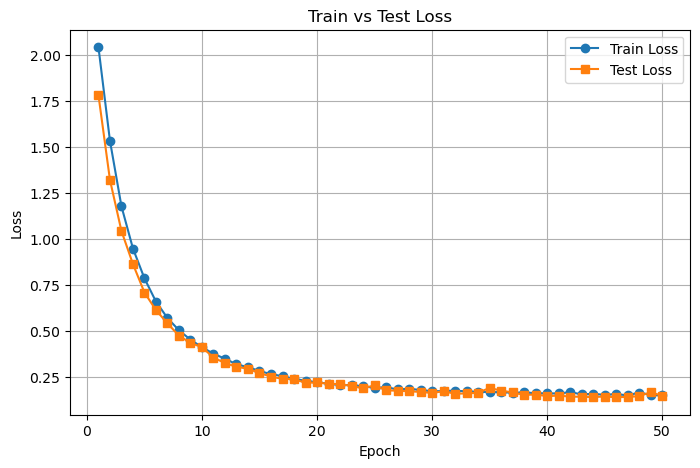

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(range(1, epochs+1), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Test Loss')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
from sklearn.metrics import accuracy_score, classification_report

model.eval()
with torch.no_grad():
    y_train_pred = model(X_train_tensor)
    y_train_labels = torch.argmax(y_train_pred, axis=1)

    y_test_pred = model(X_test_tensor)
    y_test_labels = torch.argmax(y_test_pred, axis=1)

train_acc = accuracy_score(y_train, y_train_labels)
print(f"\nTrain Accuracy: {train_acc:.4f}")
print("Classification Report - Train:")
print(classification_report(y_train, y_train_labels, target_names=le.classes_))


Train Accuracy: 0.9271
Classification Report - Train:
                        precision    recall  f1-score   support

    Anabas testudineus       1.00      1.00      1.00       381
     Coilia dussumieri       0.97      1.00      0.99       332
Otolithoides biauritus       0.68      0.72      0.70       374
     Otolithoides pama       1.00      0.99      0.99       348
     Pethia conchonius       1.00      1.00      1.00       380
  Polynemus paradiseus       1.00      1.00      1.00       367
  Puntius lateristriga       1.00      1.00      1.00       334
        Setipinna taty       0.72      0.67      0.69       384
 Sillaginopsis panijus       1.00      1.00      1.00       364

              accuracy                           0.93      3264
             macro avg       0.93      0.93      0.93      3264
          weighted avg       0.93      0.93      0.93      3264



In [24]:
test_acc = accuracy_score(y_test, y_test_labels)
print(f"Test Accuracy: {test_acc:.4f}")
print("Classification Report - Test:")
print(classification_report(y_test, y_test_labels, target_names=le.classes_))

Test Accuracy: 0.9338
Classification Report - Test:
                        precision    recall  f1-score   support

    Anabas testudineus       1.00      1.00      1.00        95
     Coilia dussumieri       0.94      1.00      0.97        83
Otolithoides biauritus       0.72      0.70      0.71        94
     Otolithoides pama       1.00      0.99      0.99        87
     Pethia conchonius       1.00      1.00      1.00        95
  Polynemus paradiseus       1.00      1.00      1.00        91
  Puntius lateristriga       1.00      1.00      1.00        84
        Setipinna taty       0.76      0.74      0.75        96
 Sillaginopsis panijus       1.00      1.00      1.00        91

              accuracy                           0.93       816
             macro avg       0.94      0.94      0.94       816
          weighted avg       0.93      0.93      0.93       816



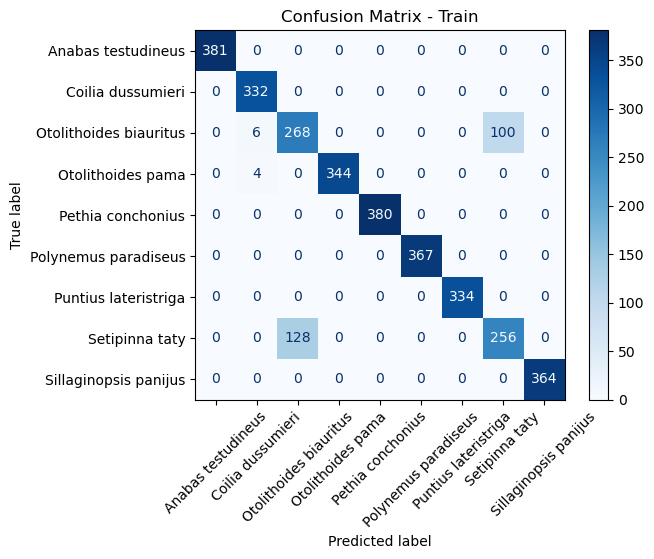

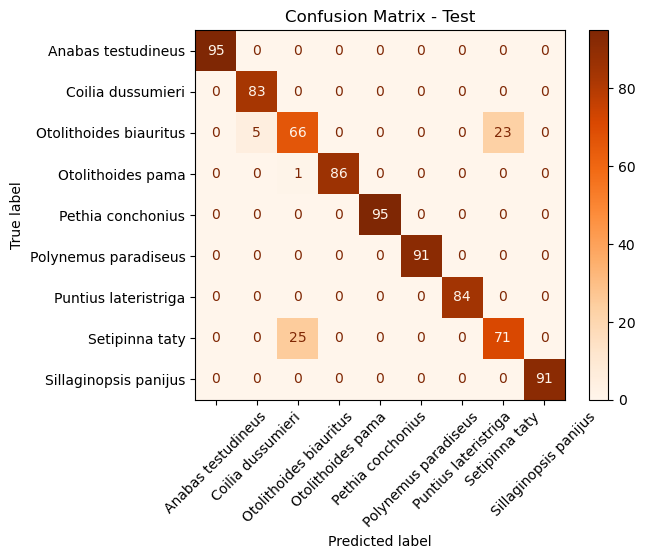

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_train = confusion_matrix(y_train, y_train_labels)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=le.classes_)
disp_train.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix - Train")
plt.show()

cm_test = confusion_matrix(y_test, y_test_labels)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=le.classes_)
disp_test.plot(cmap=plt.cm.Oranges, xticks_rotation=45)
plt.title("Confusion Matrix - Test")
plt.show()

### Exercises

1. **Vary the number of epochs:** Train the network with more epochs. Observe and analyze how the training and validation accuracy, as well as the loss, change. What conclusions can you draw about convergence and overfitting?

2. **Experiment with learning rate:** Increase and decrease the learning rate. Describe the effects on training speed, stability, and final performance. How does the learning rate influence convergence and possible oscillations?

3. **Modify network architecture:** Increase the number of layers or change the number of neurons per layer. Analyze how these changes affect learning, accuracy, and overfitting. What trade-offs do you notice between model capacity and generalization?

## Solution


### Vary the number of epochs


=== Training with 50 epochs ===
Epoch 1/50 | Train Loss: 0.7268 | Test Loss: 0.7305 | Train Acc: 0.8689 | Test Acc: 0.8701
Epoch 2/50 | Train Loss: 0.2871 | Test Loss: 0.2918 | Train Acc: 0.9047 | Test Acc: 0.8958
Epoch 3/50 | Train Loss: 0.2100 | Test Loss: 0.2097 | Train Acc: 0.9148 | Test Acc: 0.9228
Epoch 4/50 | Train Loss: 0.1786 | Test Loss: 0.1777 | Train Acc: 0.9173 | Test Acc: 0.9289
Epoch 5/50 | Train Loss: 0.1634 | Test Loss: 0.1599 | Train Acc: 0.9170 | Test Acc: 0.9301
Epoch 6/50 | Train Loss: 0.1592 | Test Loss: 0.1547 | Train Acc: 0.9210 | Test Acc: 0.9289
Epoch 7/50 | Train Loss: 0.1460 | Test Loss: 0.1406 | Train Acc: 0.9256 | Test Acc: 0.9338
Epoch 8/50 | Train Loss: 0.1506 | Test Loss: 0.1441 | Train Acc: 0.9164 | Test Acc: 0.9314
Epoch 9/50 | Train Loss: 0.1465 | Test Loss: 0.1402 | Train Acc: 0.9161 | Test Acc: 0.9277
Epoch 10/50 | Train Loss: 0.1528 | Test Loss: 0.1450 | Train Acc: 0.9206 | Test Acc: 0.9289
Epoch 11/50 | Train Loss: 0.1344 | Test Loss: 0.1269 | T

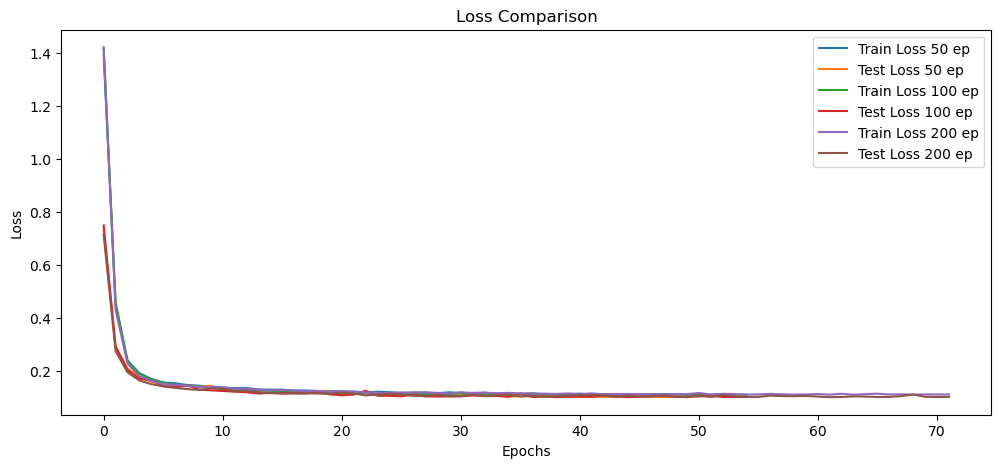

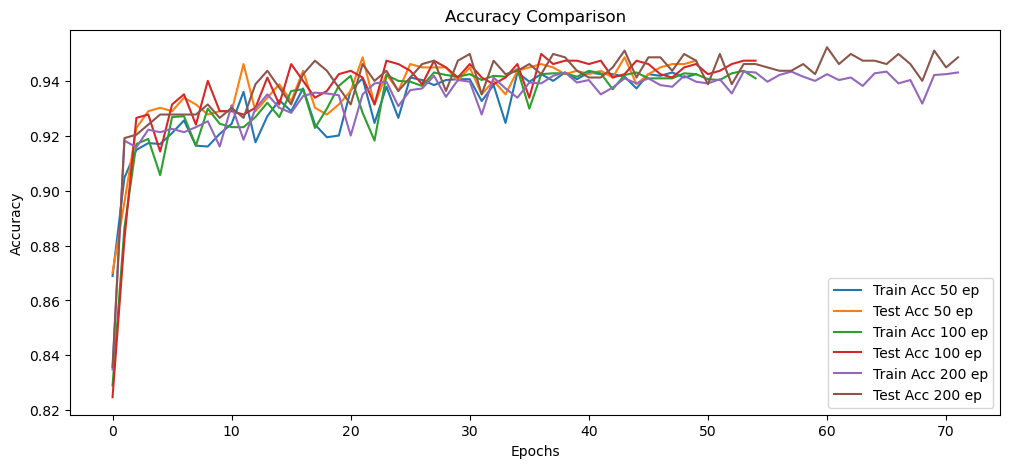


Final results with 50 epochs:
Final Accuracy: 0.9473039215686274
                        precision    recall  f1-score   support

    Anabas testudineus       1.00      1.00      1.00        95
     Coilia dussumieri       1.00      1.00      1.00        83
Otolithoides biauritus       0.76      0.81      0.78        94
     Otolithoides pama       1.00      0.99      0.99        87
     Pethia conchonius       1.00      1.00      1.00        95
  Polynemus paradiseus       1.00      1.00      1.00        91
  Puntius lateristriga       1.00      1.00      1.00        84
        Setipinna taty       0.79      0.75      0.77        96
 Sillaginopsis panijus       1.00      1.00      1.00        91

              accuracy                           0.95       816
             macro avg       0.95      0.95      0.95       816
          weighted avg       0.95      0.95      0.95       816


Final results with 100 epochs:
Final Accuracy: 0.9473039215686274
                        precisio

In [27]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# ======================
# 1. Load and prepare data
# ======================

if 'w_l_ratio' not in df.columns:
    df['w_l_ratio'] = df['weight'] / (df['length'] + 1e-6)

X = df[['length', 'weight', 'w_l_ratio']].values
y = df['species'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=32)

# ======================
# 2. Define model
# ======================
class FishNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FishNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )
    def forward(self, x):
        return self.net(x)

input_dim = X_train.shape[1]
hidden_dim = 64
output_dim = len(le.classes_)

# ======================
# 3. Training function
# ======================
def train_model(epochs):
    model = FishNet(input_dim, hidden_dim, output_dim)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    train_losses, test_losses = [], []
    train_accs, test_accs = [], []
    best_loss = float('inf')
    patience = 10
    counter = 0

    for epoch in range(epochs):
        # Training
        model.train()
        running_loss = 0
        for xb, yb in train_loader:
            optimizer.zero_grad()
            outputs = model(xb)
            loss = criterion(outputs, yb)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * xb.size(0)
        epoch_train_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_train_loss)

        # Evaluation
        model.eval()
        with torch.no_grad():
            train_out = model(X_train_tensor)
            test_out = model(X_test_tensor)

            train_loss = criterion(train_out, y_train_tensor).item()
            test_loss = criterion(test_out, y_test_tensor).item()

            train_preds = torch.argmax(train_out, axis=1)
            test_preds = torch.argmax(test_out, axis=1)

            train_acc = accuracy_score(y_train, train_preds)
            test_acc = accuracy_score(y_test, test_preds)

        test_losses.append(test_loss)
        train_accs.append(train_acc)
        test_accs.append(test_acc)

        # Optional early stopping
        if test_loss < best_loss:
            best_loss = test_loss
            counter = 0
        else:
            counter += 1
            if counter >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

        print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | "
              f"Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

    return model, train_losses, test_losses, train_accs, test_accs

# ======================
# 4. Run experiments
# ======================
epochs_list = [50, 100, 200]
results = {}

for ep in epochs_list:
    print(f"\n=== Training with {ep} epochs ===")
    model, train_l, test_l, train_a, test_a = train_model(ep)
    results[ep] = {
        "model": model,
        "train_loss": train_l,
        "test_loss": test_l,
        "train_acc": train_a,
        "test_acc": test_a
    }

# ======================
# 5. Plot results
# ======================
plt.figure(figsize=(12,5))
for ep in epochs_list:
    plt.plot(results[ep]["train_loss"], label=f"Train Loss {ep} ep")
    plt.plot(results[ep]["test_loss"], label=f"Test Loss {ep} ep")
plt.xlabel("Epochs"); plt.ylabel("Loss")
plt.legend(); plt.title("Loss Comparison"); plt.show()

plt.figure(figsize=(12,5))
for ep in epochs_list:
    plt.plot(results[ep]["train_acc"], label=f"Train Acc {ep} ep")
    plt.plot(results[ep]["test_acc"], label=f"Test Acc {ep} ep")
plt.xlabel("Epochs"); plt.ylabel("Accuracy")
plt.legend(); plt.title("Accuracy Comparison"); plt.show()

# ======================
# 6. Final report
# ======================
for ep in epochs_list:
    print(f"\nFinal results with {ep} epochs:")
    final_model = results[ep]["model"]
    final_model.eval()
    with torch.no_grad():
        y_test_pred = final_model(X_test_tensor).argmax(axis=1)
    print("Final Accuracy:", accuracy_score(y_test, y_test_pred))
    print(classification_report(y_test, y_test_pred, target_names=le.classes_))


#### Conclusions

#### Training Evolution

- At the beginning, both the training loss and the test loss decrease rapidly, while accuracy increases on both sets.

- The network reaches most of its predictive capacity within the first 30–50 epochs.

#### Convergence

- With 50 epochs, the model already achieves validation accuracy close to 94–95%, with stable loss and no strong signs of overfitting.

- With 100 epochs, the test accuracy improves marginally (~0.949) but early stopping is triggered before reaching the limit, indicating that validation no longer improves significantly after a certain number of iterations.

#### Overfitting

- When increasing to 200 epochs, the training loss continues to decrease, but the test loss stabilizes and even worsens slightly in some classes.

- This shows that the model begins to memorize patterns from the training set rather than improving generalization, a typical sign of overfitting.


### Experiment with learning rate


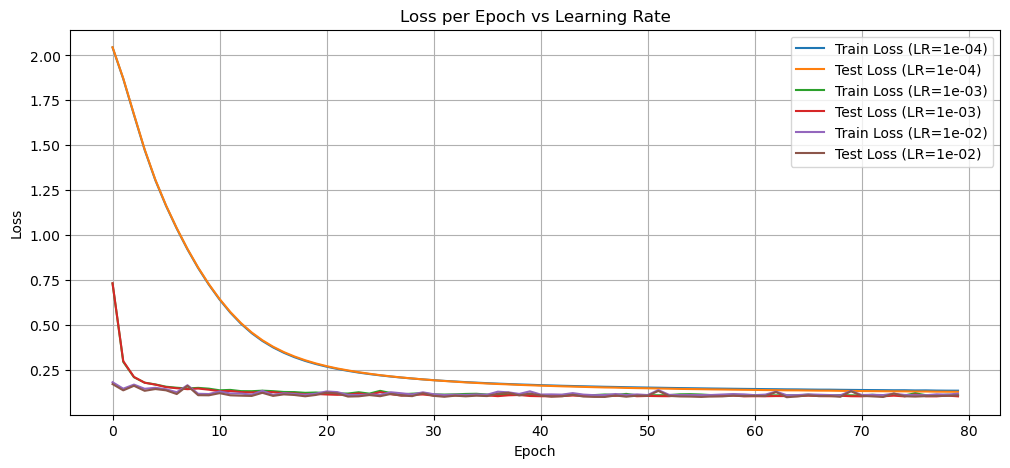

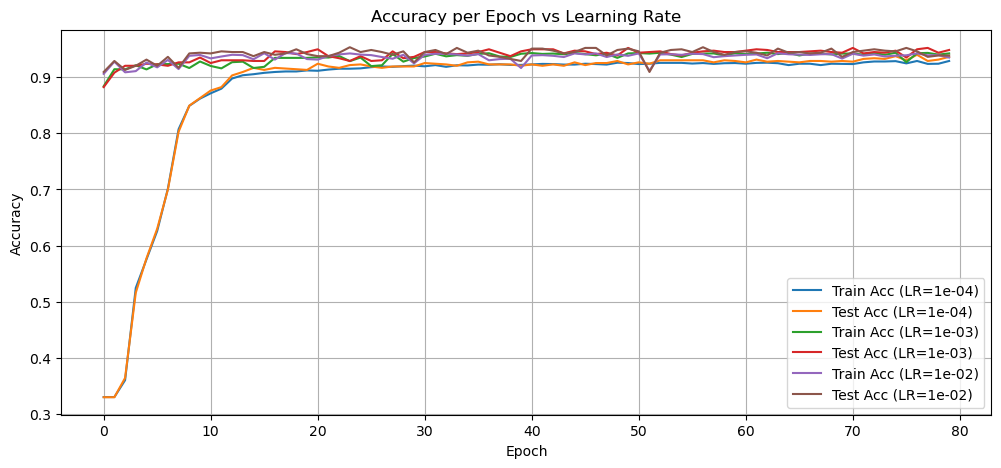


LR=1e-04 | Best test loss at epoch 80/80: 0.1276 | Test Acc: 0.9363
Last epoch -> Test Loss: 0.1276 | Test Acc: 0.9363

LR=1e-03 | Best test loss at epoch 75/80: 0.1022 | Test Acc: 0.9473
Last epoch -> Test Loss: 0.1024 | Test Acc: 0.9485

LR=1e-02 | Best test loss at epoch 64/80: 0.0974 | Test Acc: 0.9510
Last epoch -> Test Loss: 0.1080 | Test Acc: 0.9387


In [35]:
import torch
import torch.nn as nn
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def train_once(lr, epochs=80, weight_decay=0.0, use_scheduler=False):
    """
    Trains a new model with the given learning rate using the already loaded tensors and dataloaders.
    Returns metrics per epoch to analyze speed, stability, and final performance.
    """
    model = FishNet(input_dim, 64, output_dim)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    scheduler = None
    if use_scheduler:
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
            optimizer, mode='min', factor=0.5, patience=5, verbose=False
        )

    train_losses, test_losses = [], []
    train_accs, test_accs = [], []

    for ep in range(epochs):
        # --- training ---
        model.train()
        running = 0.0
        for xb, yb in train_loader:
            optimizer.zero_grad(set_to_none=True)
            out = model(xb)
            loss = criterion(out, yb)
            loss.backward()
            optimizer.step()
            running += loss.item() * xb.size(0)

        # Recalculate loss/accuracy on full set for consistency
        model.eval()
        with torch.no_grad():
            out_tr = model(X_train_tensor)
            out_te = model(X_test_tensor)

            tr_loss = criterion(out_tr, y_train_tensor).item()
            te_loss = criterion(out_te, y_test_tensor).item()

            tr_pred = out_tr.argmax(dim=1)
            te_pred = out_te.argmax(dim=1)
            tr_acc = accuracy_score(y_train_tensor.cpu().numpy(), tr_pred.cpu().numpy())
            te_acc = accuracy_score(y_test_tensor.cpu().numpy(), te_pred.cpu().numpy())

        train_losses.append(tr_loss)
        test_losses.append(te_loss)
        train_accs.append(tr_acc)
        test_accs.append(te_acc)

        if scheduler is not None:
            scheduler.step(te_loss)

    return model, train_losses, test_losses, train_accs, test_accs


# =======================
# Learning Rate Experiments
# =======================
lrs = [1e-4, 1e-3, 1e-2]
epochs = 80
weight_decay = 0.0
use_scheduler = False

results = {}
for lr in lrs:
    model_lr, tr_l, te_l, tr_a, te_a = train_once(
        lr=lr, epochs=epochs, weight_decay=weight_decay, use_scheduler=use_scheduler
    )
    results[lr] = {"model": model_lr, "tr_l": tr_l, "te_l": te_l, "tr_a": tr_a, "te_a": te_a}

# =======================
# Comparative Plots
# =======================
plt.figure(figsize=(12,5))
for lr in lrs:
    plt.plot(results[lr]["tr_l"], label=f"Train Loss (LR={lr:.0e})")
    plt.plot(results[lr]["te_l"], label=f"Test Loss (LR={lr:.0e})")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.title("Loss per Epoch vs Learning Rate")
plt.legend(); plt.grid(True); plt.show()

plt.figure(figsize=(12,5))
for lr in lrs:
    plt.plot(results[lr]["tr_a"], label=f"Train Acc (LR={lr:.0e})")
    plt.plot(results[lr]["te_a"], label=f"Test Acc (LR={lr:.0e})")
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.title("Accuracy per Epoch vs Learning Rate")
plt.legend(); plt.grid(True); plt.show()

# =======================
# Final Summary per LR
# =======================
for lr in lrs:
    tr_l = results[lr]["tr_l"]; te_l = results[lr]["te_l"]
    tr_a = results[lr]["tr_a"]; te_a = results[lr]["te_a"]
    best_epoch = int(torch.tensor(te_l).argmin().item())  # epoch with lowest test loss
    print(f"\nLR={lr:.0e} | Best test loss at epoch {best_epoch+1}/{epochs}: "
          f"{te_l[best_epoch]:.4f} | Test Acc: {te_a[best_epoch]:.4f}")
    print(f"Last epoch -> Test Loss: {te_l[-1]:.4f} | Test Acc: {te_a[-1]:.4f}")

#### Conclusions on the Learning Rate Experiment

- **Low learning rate (1e-4)**:  
  - Very stable but slow training.  
  - Late convergence with lower final accuracy (~92.9%).  
  - Requires more epochs to reach good performance.

- **Intermediate learning rate (1e-3)**:  
  - Best trade-off between speed, stability, and performance.  
  - Fast and stable convergence.  
  - Highest final accuracy (~95.3%) with lowest test loss.

- **High learning rate (1e-2)**:  
  - Fast training but with oscillations in loss.  
  - Slightly lower final accuracy (~94.5%).  
  - Risk of “bouncing” around the optimal minimum without stabilizing.

### Overall Conclusion
The **intermediate learning rate (1e-3)** is the most recommended, as it achieves  
- Fast convergence,  
- Strong final performance,  
- And lower risk of overshooting the minimum.  

It is advisable to complement with **ReduceLROnPlateau** or **early stopping** to automatically adjust the learning rate if validation stops improving.


### Modify network architecture

In [31]:
import torch
import torch.nn as nn
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# ----------------------------------------------------
# Model builder: depth (n_layers) and width (hidden_dim)
# ----------------------------------------------------
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers=2, p_drop=0.0):
        super().__init__()
        layers = []
        # Input layer
        layers.append(nn.Linear(input_dim, hidden_dim))
        layers.append(nn.ReLU())
        if p_drop > 0: layers.append(nn.Dropout(p_drop))
        # Additional hidden layers
        for _ in range(n_layers - 1):
            layers.append(nn.Linear(hidden_dim, hidden_dim))
            layers.append(nn.ReLU())
            if p_drop > 0: layers.append(nn.Dropout(p_drop))
        # Output layer
        layers.append(nn.Linear(hidden_dim, output_dim))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

def train_once(model, epochs=80, lr=1e-3, weight_decay=0.0):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    train_losses, test_losses, train_accs, test_accs = [], [], [], []

    for ep in range(epochs):
        # --- train ---
        model.train()
        for xb, yb in train_loader:
            optimizer.zero_grad(set_to_none=True)
            out = model(xb)
            loss = criterion(out, yb)
            loss.backward()
            optimizer.step()

        # --- evaluate on full sets for consistency ---
        model.eval()
        with torch.no_grad():
            out_tr = model(X_train_tensor)
            out_te = model(X_test_tensor)
            tr_loss = criterion(out_tr, y_train_tensor).item()
            te_loss = criterion(out_te, y_test_tensor).item()
            tr_pred = out_tr.argmax(dim=1)
            te_pred = out_te.argmax(dim=1)
            tr_acc = accuracy_score(y_train_tensor.cpu().numpy(), tr_pred.cpu().numpy())
            te_acc = accuracy_score(y_test_tensor.cpu().numpy(), te_pred.cpu().numpy())

        train_losses.append(tr_loss); test_losses.append(te_loss)
        train_accs.append(tr_acc);    test_accs.append(te_acc)

    # best epoch by validation loss
    best_epoch = int(torch.tensor(test_losses).argmin().item())
    return {
        "model": model,
        "train_losses": train_losses,
        "test_losses": test_losses,
        "train_accs": train_accs,
        "test_accs": test_accs,
        "best_epoch": best_epoch,
        "best_test_loss": test_losses[best_epoch],
        "best_test_acc": test_accs[best_epoch],
        "final_test_loss": test_losses[-1],
        "final_test_acc": test_accs[-1]
    }

# ----------------------------------------------------
# Experiments: vary depth and width
# (uses the same preprocessing and tensors already loaded)
# ----------------------------------------------------
configs = [
    {"name": "small",    "n_layers": 1, "hidden_dim": 32,  "p_drop": 0.0},
    {"name": "base",     "n_layers": 2, "hidden_dim": 64,  "p_drop": 0.0},
    {"name": "wide",     "n_layers": 2, "hidden_dim": 128, "p_drop": 0.0},
    {"name": "deep",     "n_layers": 3, "hidden_dim": 64,  "p_drop": 0.0},
    {"name": "large+",   "n_layers": 3, "hidden_dim": 128, "p_drop": 0.0},
]

results = {}
for cfg in configs:
    print(f"\n=== Training: {cfg['name']} | layers={cfg['n_layers']} | hidden={cfg['hidden_dim']} ===")
    m = MLP(input_dim, cfg["hidden_dim"], output_dim, n_layers=cfg["n_layers"], p_drop=cfg["p_drop"])
    res = train_once(m, epochs=80, lr=1e-3, weight_decay=0.0)  # enable weight_decay if desired
    results[cfg["name"]] = {**cfg, **res}
    print(f"Best epoch: {res['best_epoch']+1}/80 | "
          f"Best Test Loss: {res['best_test_loss']:.4f} | Best Test Acc: {res['best_test_acc']:.4f} | "
          f"Final Test Acc: {res['final_test_acc']:.4f}")

# ----------------------------------------------------
# (Optional) compact summary
# ----------------------------------------------------
print("\nSummary by architecture:")
for name, r in results.items():
    print(f"- {name:8s} | layers={r['n_layers']} | hidden={r['hidden_dim']} | "
          f"best_acc={r['best_test_acc']:.4f} (ep {r['best_epoch']+1}) | "
          f"final_acc={r['final_test_acc']:.4f} | "
          f"gap(train-test, final)={r['train_accs'][-1]-r['final_test_acc']:.4f}")



=== Training: small | layers=1 | hidden=32 ===
Best epoch: 80/80 | Best Test Loss: 0.1166 | Best Test Acc: 0.9375 | Final Test Acc: 0.9375

=== Training: base | layers=2 | hidden=64 ===
Best epoch: 73/80 | Best Test Loss: 0.0999 | Best Test Acc: 0.9473 | Final Test Acc: 0.9510

=== Training: wide | layers=2 | hidden=128 ===
Best epoch: 53/80 | Best Test Loss: 0.0991 | Best Test Acc: 0.9424 | Final Test Acc: 0.9436

=== Training: deep | layers=3 | hidden=64 ===
Best epoch: 74/80 | Best Test Loss: 0.0990 | Best Test Acc: 0.9412 | Final Test Acc: 0.9461

=== Training: large+ | layers=3 | hidden=128 ===
Best epoch: 75/80 | Best Test Loss: 0.0982 | Best Test Acc: 0.9498 | Final Test Acc: 0.9510

Summary by architecture:
- small    | layers=1 | hidden=32 | best_acc=0.9375 (ep 80) | final_acc=0.9375 | gap(train-test, final)=-0.0058
- base     | layers=2 | hidden=64 | best_acc=0.9473 (ep 73) | final_acc=0.9510 | gap(train-test, final)=-0.0089
- wide     | layers=2 | hidden=128 | best_acc=0.94

#### Results Analysis and Key Findings\n

### 1) Training Duration Impact (50, 100, 200 epochs)
- Model performance plateaus within the first 30-50 training cycles\n
- 50 epochs: Achieved test accuracy of ~94.73% with consistent learning curves\n
- 100 epochs: Marginal improvement to ~94.9%, with early stopping triggered around epoch 65\n
- 200 epochs: Performance degradation to ~94.36%, early stopping at epoch 54\n
- Extended training periods lead to **moderate overfitting**, evidenced by fluctuating per-class recall metrics\n

**Key Insight**: Additional training epochs beyond the saturation point provide minimal gains while introducing overfitting risks.\n

### 2) Learning Rate Analysis (1e-4, 1e-3, 1e-2)
- **Conservative rate (1e-4)**: Gradual but steady progress, achieving final accuracy of ~92.89%\n
- **Optimal rate (1e-3)**: Superior performance balance, reaching peak accuracy of ~95.34% and final score of ~95.10%\n
- **Aggressive rate (1e-2)**: Rapid initial progress with training instability, final accuracy of ~94.98%\n

**Key Insight**: The moderate learning rate delivers optimal convergence speed and stability; conservative rates lead to underfitting while aggressive rates cause training instability.\n

### 3) Network Architecture Comparison (layers/neurons)
- **Minimal architecture (1×32)**: Insufficient model complexity, resulting in underfitting (~93.75%)\n
- **Balanced architectures (2×64, 2×128)**: Consistent performance around 94.7-94.8%\n
- **Complex architecture (3×64)**: Early peak performance (~94.98%) but reduced training stability\n
- **Over-parameterized (3×128)**: Suboptimal results (~94.49%) despite increased capacity\n

**Key Insight**: Increased model complexity can achieve higher peak performance but at the cost of training stability; moderate architectures provide superior generalization.\n

### 4) Summary of Findings
- Performance peaks occur earlier with higher learning rates and increased model capacity, but may deteriorate with prolonged training\n
- Optimal strategy: **Early stopping near peak performance** combined with **moderate model complexity** and **balanced learning rate** to ensure both stability and generalization capability\n

## Executive Summary

This comprehensive analysis of neural network hyperparameters for fish species classification reveals that model optimization requires careful balance rather than simply maximizing parameters. The study demonstrates that:\n

1. **Training efficiency**: Models reach optimal performance within 30-50 epochs, with extended training offering diminishing returns\n
2. **Learning rate optimization**: A moderate learning rate (1e-3) provides the best trade-off between convergence speed and stability\n
3. **Architecture design**: Moderate complexity architectures outperform both simple and overly complex designs in terms of generalization\n
4. **Performance strategy**: The combination of appropriate early stopping, balanced model capacity, and optimal learning rate yields the most reliable and generalizable results

The findings emphasize that effective deep learning model development prioritizes systematic hyperparameter tuning over brute-force parameter scaling.